<h3>Clustering</h3> 

<b>k-Means Clustering</b><br>
k-means clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes. The following example illustrates the algorithm on a synthetic dataset:

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 9.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=1d86dc5169e82187d0b7d63de1b620961f18422ea0f0507bc5d6412fbbc89ebe
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


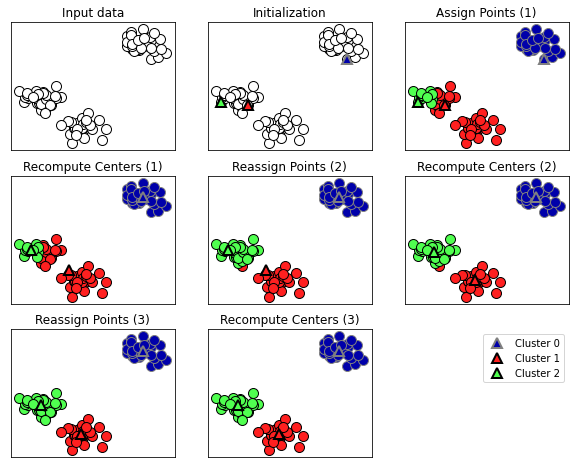

In [2]:
import mglearn
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
mglearn.plots.plot_kmeans_algorithm()
plt.show()

Applying k-means with scikit-learn is quite straightforward. Here, we apply it to the synthetic data that we used for the preceding plots. We instantiate the <samp>KMeans class</samp>, and set the number of clusters we are looking for 3. The <samp>KMeans class</samp> takes in input <samp>n_clusters</samp>. Then we call the fit method with the data:

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

During the algorithm, each training data point in X is assigned a cluster label. You can find these labels in the <samp>kmeans.labels_ attribute</samp>:

In [5]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


You can also assign cluster labels to <b>new points</b>, using the predict method. Each new point is assigned to the closest cluster center when predicting, but the existing model is not changed. Running <samp>predict</samp> (method of <samp> KMeans</samp> class) on the training set returns the same result as <samp>labels_</samp>:

In [28]:

print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


 The cluster centers are stored in the <samp>cluster_centers_</samp> attribute, and we plot them as triangles:

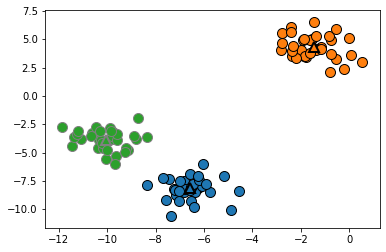

In [9]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show()

We can also use more or fewer cluster centers. Complete the code setting the number of clustering equals to 2 and 5 respectively.

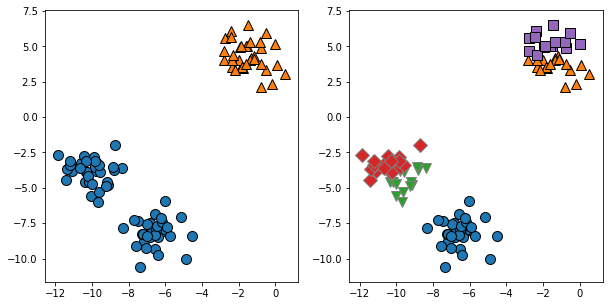

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

<b>Failure cases of k-means</b> <br>
Even if you know the "right" number of clusters for a given dataset, k-means might not always be able to recover them. Each cluster is defined solely by its center, which means that each cluster is a convex shape. <b>As a result of this, k-means can only capture relatively simple shapes</b>. k-means also assumes that all clusters have the same "diameter" in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. That can sometimes lead to surprising results:


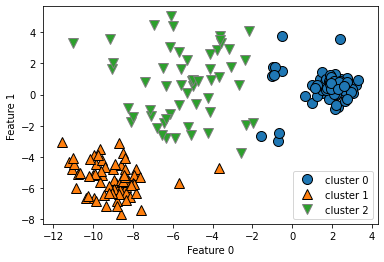

In [31]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

One might have expected the dense region in the lower left to be the first cluster, the dense region in the upper right to be the second, and the less dense region in the center to be the third. <br>
Instead, both cluster 0 and cluster 1 have some points that are far away from all the other points in these clusters that “reach” toward the center. k-means also assumes that all directions are equally important for each cluster. The following plot shows a two-dimensional dataset where there are three clearly separated parts in the data. However, these groups are stretched toward the diagonal. As k-means only considers the distance to the nearest cluster center, it can't handle this kind of data:

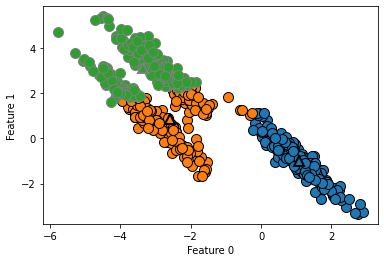

In [32]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

k-means also performs poorly if the clusters have more complex shapes, like the <samp>two_moons</samp>

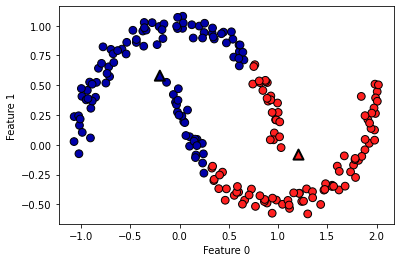

In [33]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

But we can find a more expressive representation with k-means, by using more cluster centers 

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


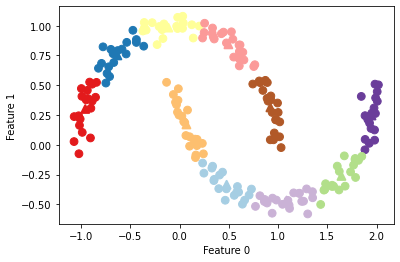

In [34]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))
plt.show()

k-means is a very popular algorithm for clustering, not only because it is relatively easy to understand and implement, but also because it runs relatively quickly. <br>
kmeans scales easily to large datasets, and scikit-learn even includes a more scalable variant in the <samp>MiniBatchKMeans</samp> class, which can handle very large datasets. <br> 
One of the drawbacks of k-means is that it relies on a <i>random initialization</i>, which means the outcome of the algorithm depends on a random seed. By default, scikitlearn runs the algorithm 10 times with 10 different random initializations, and returns the best result (it means that the sum of variances of the clusters is small). Further downsides of k-means are the relatively restrictive assumptions made on the shape of clusters, and the requirement to specify the number of clusters you are looking for (which might not be known in a real-world application). 

<b>Agglomerative Clustering</b><br>
Agglomerative clustering refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. <br>
The stopping criterion implemented in scikit-learn is the number of clusters, so similar clusters are merged until only the specified number of clusters are left. <br>
There are several linkage criteria that specify how exactly the "most similar cluster" is measured. This measure is always defined between two existing clusters. The three choices are implemented in scikit-learn: <samp>ward</samp>, <samp>average</samp> and <samp>complete</samp>. <br>
<samp>ward</samp> works on most datasets, and we will use it in our examples. If the clusters have very dissimilar numbers of members (if one is much bigger than all the others, for example), average or complete might work better. The following plot illustrates the progression of agglomerative clustering on a two-dimensional dataset, looking for three clusters:


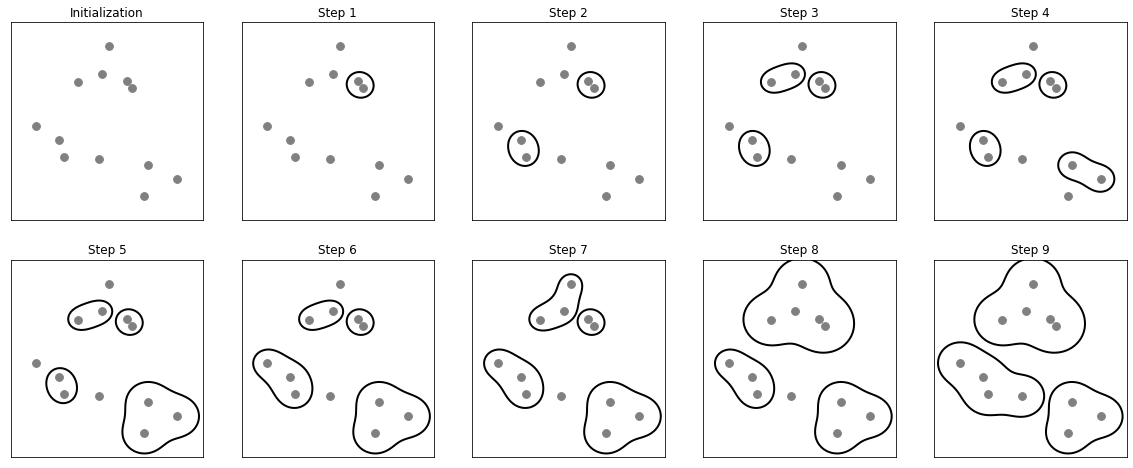

In [35]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

Let's have a look at how agglomerative clustering performs on the simple three-cluster data we used here. <i>Because of the way the algorithm works, agglomerative clustering cannot make predictions for new data points</i>. Therefore, Agglomerative Clustering has no predict method. To build the model and get the cluster memberships on the training set, use the <samp>fit_predict</samp> method instead. Set the numerb of clustering equals to 3 using <samp>n_cluster</samp>

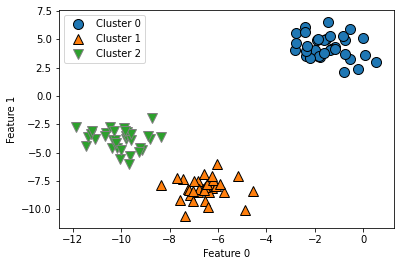

In [38]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Unfortunately, scikit-learn currently does not have the functionality to draw dendrograms. However, you can generate them easily using SciPy. <br>
SciPy provides, among other functionality, advanced linear algebra routines, mathematical function optimization, signal processing, special mathematical functions, and statistical distributions. <br>
The SciPy clustering algorithms have a slightly different interface to the scikit-learn clustering algorithms. SciPy provides a function that takes a data array X and computes a linkage array, which encodes hierarchical cluster similarities. We can then feed this linkage array into the scipy dendrogram function to plot the dendrogram 

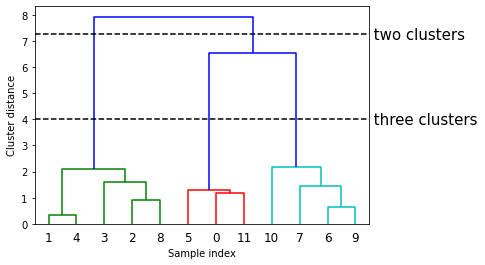

In [39]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

Unfortunately, agglomerative clustering still fails at separating complex shapes like the <samp>two_moons</samp> dataset. But the same is not true for the next algorithm we will look at DBSCAN. 

<b>DBASCAN</b><br>
Another very useful clustering algorithm is DBSCAN (which stands for “density-based spatial clustering of applications with noise”). The main benefits of DBSCAN are that it does not require the user to set the number of clusters a priori, it can capture clusters of complex shapes, and it can identify points that are not part of any cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.  

Let's apply DBSCAN on the synthetic dataset we used to demonstrate agglomerative clustering. Like agglomerative clustering, DBSCAN does not allow predictions on new test data, so we will use the <samp>fit_predict</samp> method to perform clustering and return the cluster labels in one step:


In [40]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


As you can see, all data points were assigned the label -1, which stands for noise. This is a consequence of the default parameter settings for <samp>eps</samp> and <samp>min_samples</samp>, which are not tuned for small toy datasets. The cluster assignments for different values of <samp>min_samples</samp> and <samp>eps</samp> are shown below, and visualized in: 

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


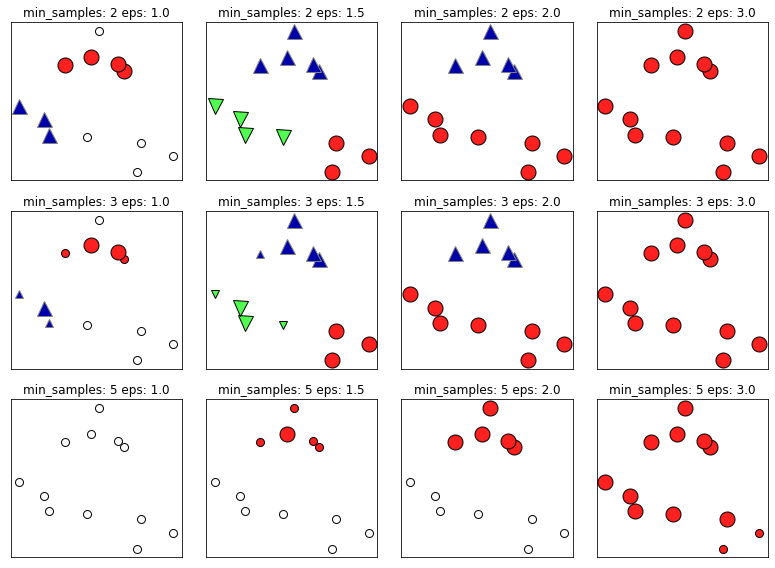

In [41]:
mglearn.plots.plot_dbscan()
plt.show()

In this plot, points that belong to clusters are solid, while the noise points are shown in white. Core samples are shown as large markers, while boundary points are displayed as smaller markers. <br> Increasing <samp>eps</samp> (going from left to right in the figure) means that more points will be included in a cluster. This makes clusters grow, but might also lead to multiple clusters joining into one. Increasing <samp>min_samples</samp> (going from top to bottom in the figure) means that fewer points will be core points, and more points will be labeled as noise. 

While DBSCAN doesn't require setting the number of clusters explicitly, setting <samp>eps</samp> implicitly controls how many clusters will be found. Finding a good setting for <samp>eps</samp> is sometimes easier after scaling the data using <samp>StandardScaler</samp>,  as using this scaling technique will ensure that all features have similar ranges.

Let's try: 
- Use the <i>fit</i> method of of <i>StandardScaler</i> to compute the mean and std of each feature on the training set (i.e. X_train). <br> Documantion: fit(X[, y]) Compute the mean and std to be used for later scaling.
- Use the <i>transform</i> method of the scaler to returns a new representation of the data. <br>
- Perform DBSCAN algorithm on these new representation.

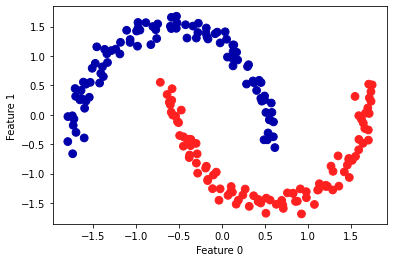

In [42]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance using StandardScaler()
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

When using DBSCAN, you need to be careful about handling the returned cluster assignments. The use of -1 to indicate noise might result in unexpected effects when using the cluster labels to index another array.


<h3>Faces Dataset</h3>

Labeled Faces in the Wild dataset contains face images of celebrities downloaded from the Internet, and it includes faces of politicians, singers, actors, and athletes from the early 2000s. We use grayscale versions of these images, and scale them down for faster processing. You can see some of the images in: 

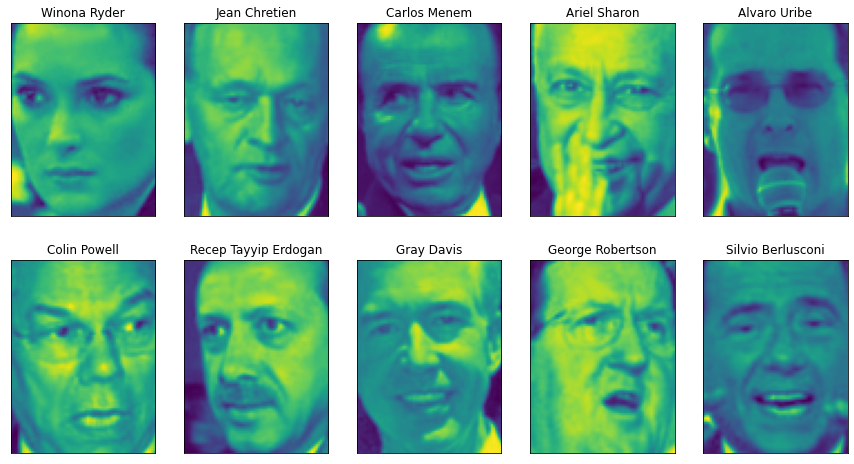

In [43]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.show()

There are 3,023 images, each 87×65 pixels large, belonging to 62 different people:

In [44]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


The dataset is a bit skewed, however, containing a lot of images of George W. Bush and Colin Powell, as you can see here:

In [45]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush). Moreover we use PCA technique to reduce the feature dimensionaly:

In [46]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Let's start to apply DBSCAN

In [47]:
# apply DBSCAN with default parameters
# Code Here
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)

print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


We see that all the returned labels are –1, so all of the data was labeled as "noise" by DBSCAN. There are two things we can change to help this: we can make <samp>eps</samp> higher, to expand the neighborhood of each point, and set <samp>min_samples</samp> lower, to consider smaller groups of points as clusters. The default values are: <samp>eps=0.5<samp>, <samp>min_samples=5</samp>. Let’s try changing <samp>min_samples</samp> first equal to 3:

In [48]:

dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)

print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


Even when considering groups of three points, everything is labeled as noise. So, we need to increase <samp>eps</samp>. Set it to 15.

In [50]:

dbscan = DBSCAN(min_samples=3,eps=15)
labels = dbscan.fit_predict(X_pca)

print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


Using a much larger eps of 15, we get only a single cluster and noise points. We can use this result to find out what the "noise" looks like compared to the rest of the data. <br> 
To understand better what's happening, let’s look at how many points are noise, and how many points are inside the cluster:

In [51]:
# count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# the first number in the result corresponds to noise points
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  32 2031]


There are very few noise points—only 32—so we can look at all of them

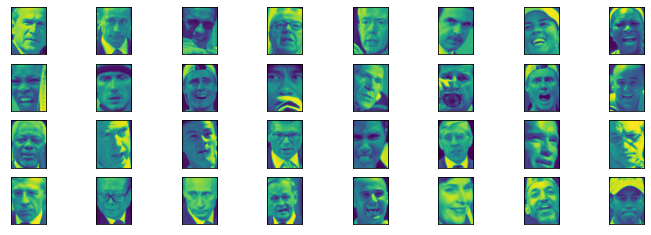

In [52]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(4, 8, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
plt.show()

looking at these images, we can guess why they were labeled as noise: the 14th image in the second row shows a person drinking from a glass, there are images of people wearing hats, and there’s a hand in front of the person’s face. The other images contain odd angles or crops that are too close or too wide. 
This kind of analysis—trying to find “the odd one out”—is called <i>outlier detection</i>. If this was a real application, we might try to do a better job of cropping images, to get more homogeneous data. There is little we can do about people in photos sometimes wearing hats, drinking, or holding something in front of their faces, but it’s good to know that these are issues in the data that any algorithm we might apply needs to handle. 

If we want to find more interesting clusters than just one large one, we need to set eps smaller, somewhere between 15 and 0.5 (the default). Let’s have a look at what different values [1, 3, 5, 7, 9, 11, 13] of eps result in:

In [55]:

for eps in [1, 3, 5, 7, 9, 11, 13]:
   print("\neps={}".format(eps))
   dbscan = DBSCAN(eps=eps, min_samples=3)
   labels = dbscan.fit_predict(X_pca)
   print("Number of clusters: {}".format(len(np.unique(labels))))
   print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 1
Cluster sizes: [2063]

eps=3
Number of clusters: 1
Cluster sizes: [2063]

eps=5
Number of clusters: 1
Cluster sizes: [2063]

eps=7
Number of clusters: 14
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Number of clusters: 4
Cluster sizes: [1307  750    3    3]

eps=11
Number of clusters: 2
Cluster sizes: [ 413 1650]

eps=13
Number of clusters: 2
Cluster sizes: [ 120 1943]


For low settings of <samp>eps</samp>, all points are labeled as noise. For <samp>eps=7</samp>, we get many noise points and many smaller clusters. For <samp>eps=9</samp> we still get many noise points, but we get one big cluster and some smaller clusters. Starting from <samp>eps=11</samp>, we get only one large cluster and noise. What is interesting to note is that there is never more than one large cluster. At most, there is one large cluster containing most of the points, and some smaller clusters. This indicates that there are not two or three different kinds of face images in the data that are very distinct, but rather that all images are more or less equally similar to (or dissimilar from) the rest. The results for <samp>eps=7</samp> look most interesting, with many small clusters. We can investigate this clustering in more detail by visualizing all of the points in each of the 13 small clusters

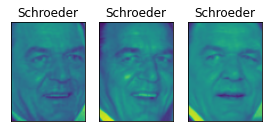

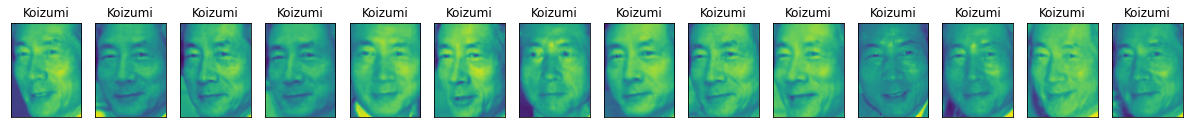

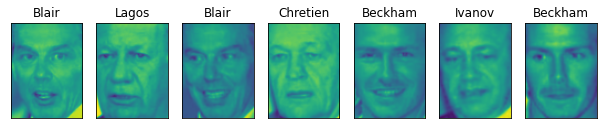

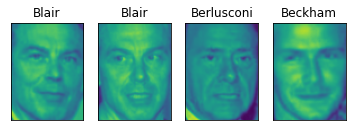

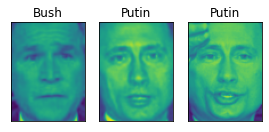

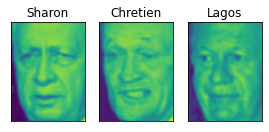

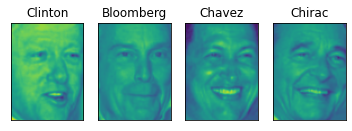

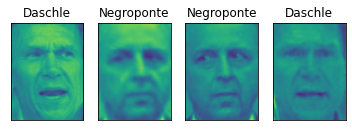

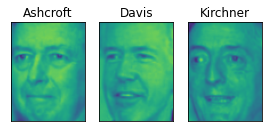

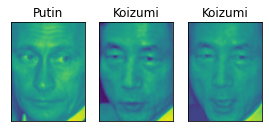

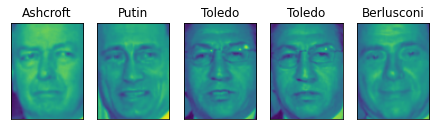

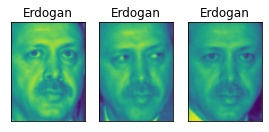

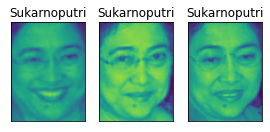

In [56]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
plt.show()

Some of the clusters correspond to people with very distinct faces (within this dataset), such as Sharon or Koizumi. Within each cluster, the orientation of the face is also quite fixed, as well as the facial expression. Some of the clusters contain faces of multiple people, but they share a similar orientation and expression. This concludes our analysis of the DBSCAN algorithm applied to the faces dataset. Let’s move on to applying k-means and agglomerative clustering. 

<b>Analyzing the faces dataset with k-means</b>

We saw that it was not possible to create more than one big cluster using DBSCAN. Agglomerative clustering and k-means are much more likely to create clusters of even size, but we do need to set a target number of clusters. We could set the number of clusters to the known number of people in the dataset, though it is very unlikely that an unsupervised clustering algorithm will recover them. Instead, we can start with a low number of clusters, like 10, which might allow us to analyze each of the clusters:

In [57]:
# extract clusters with k-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


As you can see, k-means clustering partitioned the data into relatively similarly sized clusters from 75 to 358. This is quite different from the result of DBSCAN. We can further analyze the outcome of k-means by visualizing the cluster centers.


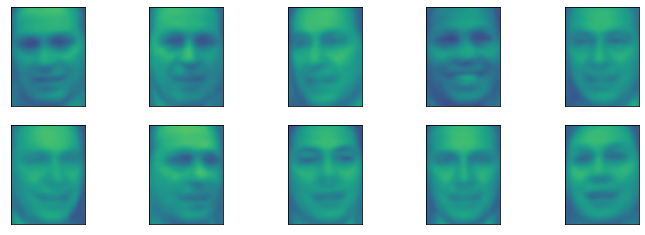

In [58]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)
plt.show()

The cluster centers found by k-means are very smooth versions of faces. This is not very surprising, given that each center is an average of 75 to 358 face images. The clustering seems to pick up on different orientations of the face, different expressions (the third cluster center seems to show a smiling face), and the presence of shirt collars (see the first cluster center). 

For a more detalied view, we show for each cluster center the five most typical images in the cluster (the images assigned to the cluster that are closest to the cluster center) and the five most atypical images in the cluster (the images assigned to the cluster that are furthest from the cluster center):


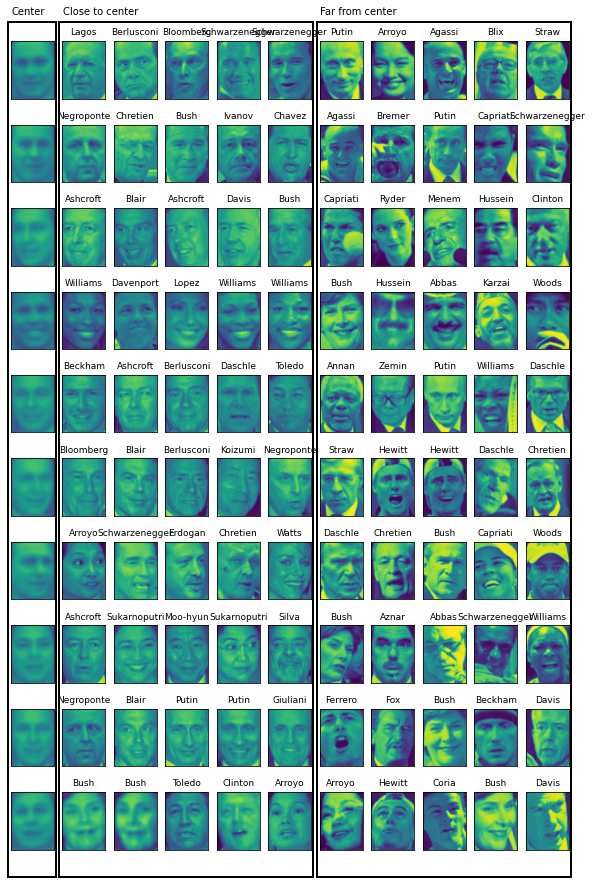

In [59]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)
plt.show()

The "atypical" points are not very similar to the cluster centers, though, and their assignment seems somewhat arbitrary. This can be attributed to the fact that k-means partitions all the data points and doesn't have a concept of "noise" points, as DBSCAN does. Using a larger number of clusters, the algorithm could find finer distinctions. However, adding more clusters makes manual inspection even harder. 

<b>Analyzing the faces dataset with agglomerative clustering</b><br>
Now, let’s look at the results of agglomerative clustering:

In [60]:
# extract clusters with ward agglomerative clustering
agglomerative=AgglomerativeClustering(n_clusters=10)
labels_agg=agglomerative.fit_predict( X_pca)

print("cluster sizes agglomerative clustering: {}".format(
       np.bincount(labels_agg)))

cluster sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


Agglomerative clustering also produces relatively equally sized clusters, with cluster sizes between 18 and 660. These are more uneven than those produced by k-means, but much more even than the ones produced by DBSCAN.

Next, we might want to plot the dendrogram. We’ll limit the depth of the tree in the plot, as branching down to the individual 2,063 data points would result in an unreadably dense plot:

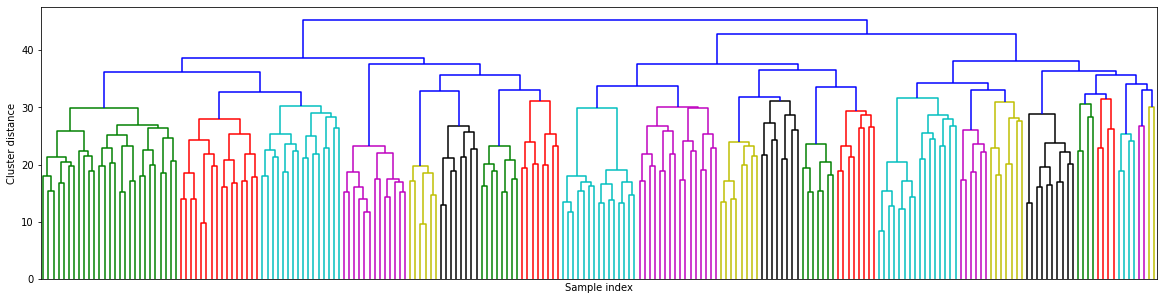

In [61]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X_pca)


# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

Creating 10 clusters, we cut across the tree at the very top, where there are 10 vertical lines. In the dendrogram for the toy data, you could see by the length of the branches that two or three clusters might capture the data appropriately. For the faces data, there doesn't seem to be a very natural cutoff point. There are some branches that represent more distinct groups, but there doesn't appear to be a particular number of clusters that is a good fit. This is not surprising, given the results of DBSCAN, which tried to cluster all points together. Let's visualize the 10 clusters, as we did for k-means earlier. Note that there is no notion of cluster center in agglomerative clustering (though we could compute the mean), and we simply show the first couple of points in each cluster. We show the number of points in each cluster to the left of the first image:

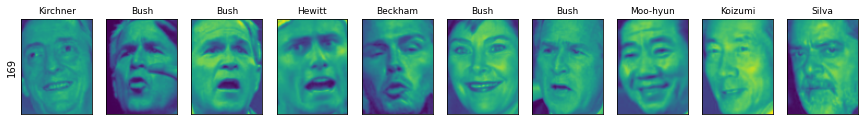

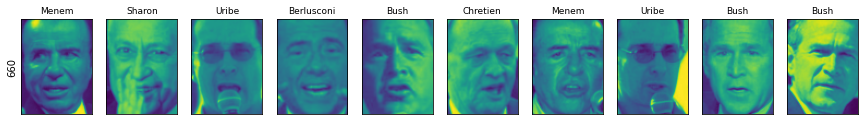

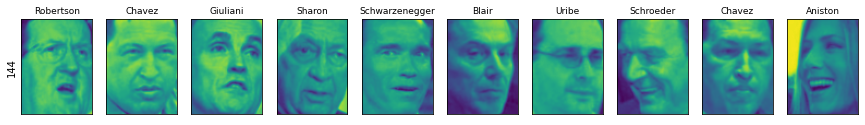

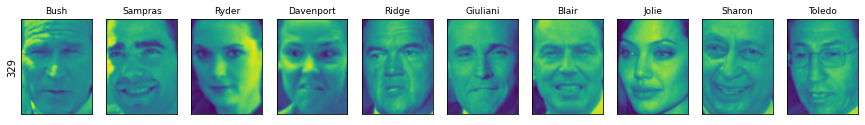

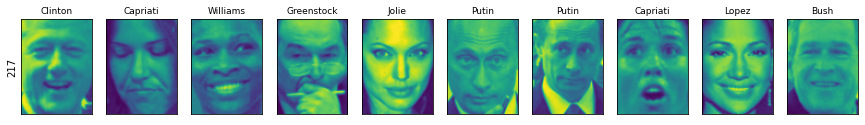

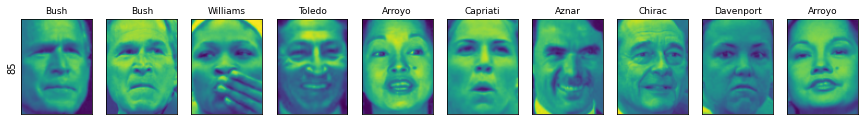

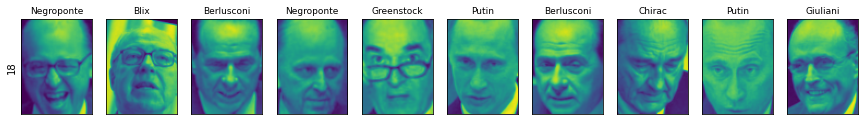

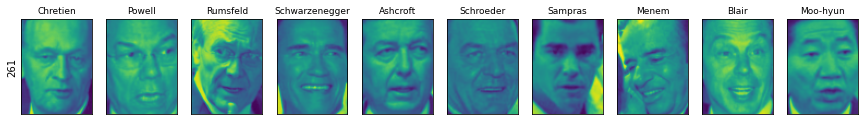

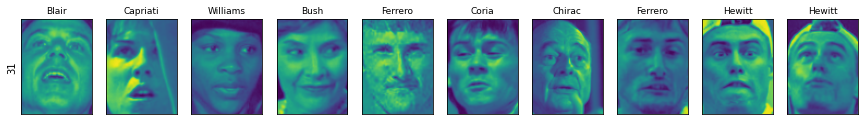

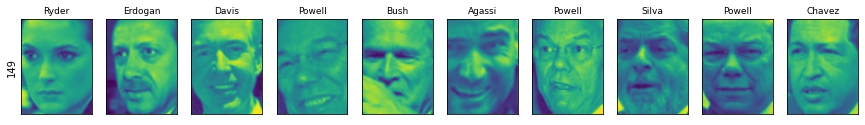

In [62]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
plt.show()

While some of the clusters seem to have a semantic theme, many of them are too large to be actually homogeneous. To get more homogeneous clusters, we can run the algorithm again, this time with 40 clusters, and pick out some of the clusters that are particularly interesting:

cluster sizes agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


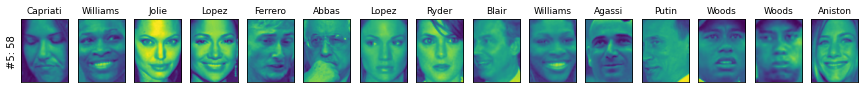

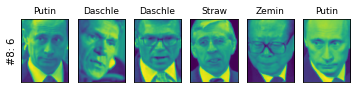

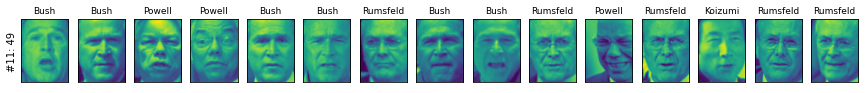

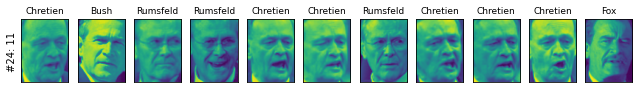

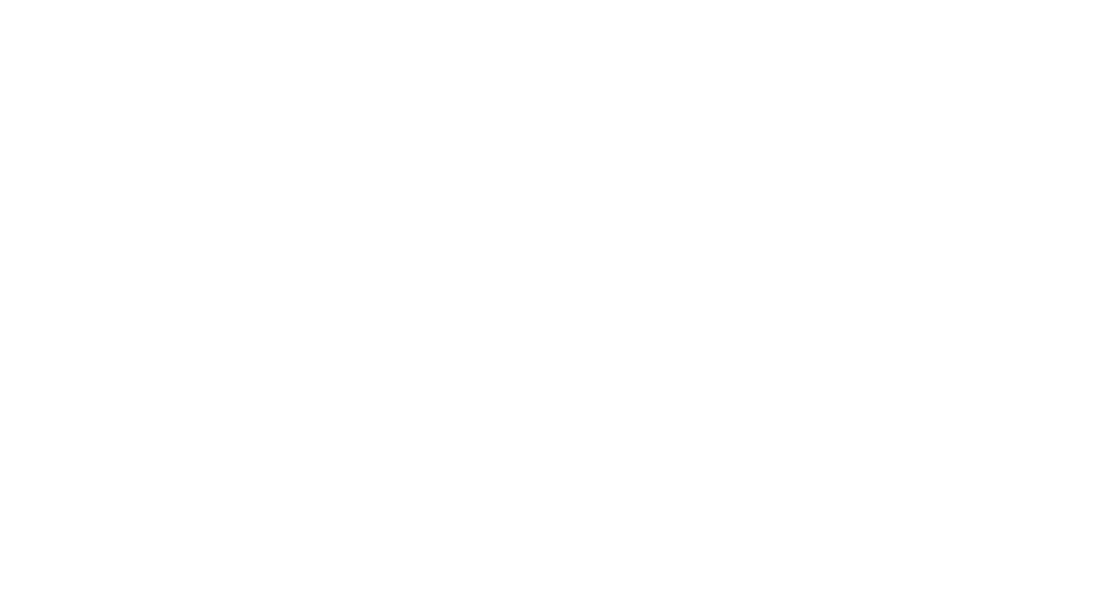

In [63]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 50
for cluster in [5, 8, 11, 24, 50]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)
plt.show()

Here, the clustering seems to have picked up on “collared shirt”. We could also find these highly similar clusters using the dendrogram, if we did more a detailed analysis. 